In this notebook, a clustering of the obtained texts will be done in order to verify the labels they were given originally at the moment of downloading.

# Importaciones de librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from src.modeling.utils.utils import drop_dataset_unnecessary_columns
from src.modeling.utils.utils import pca
from src.preparation.data_access.obtained_text_da import ObtainedTextDA
from typing import List
%matplotlib inline

/home/hans/Documentos/Tesis_Chatbot/.env/lib/python3.8/site-packages/sqlalchemy/orm/util.py:104: SAWarning: The 'delete-orphan' cascade option requires 'delete'.
  util.warn(


# Constantes

In [2]:
indices = {
    'Conectivos': ['CNCAll', 'CNCCaus', 'CNCLogic', 'CNCADC', 'CNCTemp', 'CNCAdd'],
    'Descriptivos': ['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESSL', 'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd'],
    'Diversidad lexica': ['LDTTRa', 'LDTTRcw'],
    'Legibilidad': ['RDFHGL'],
    'Cohesion referencial': ['CRFNO1', 'CRFNOa', 'CRFAO1', 'CRFAOa', 'CRFSO1', 'CRFSOa', 'CRFCWO1', 'CRFCWO1d', 'CRFCWOa', 'CRFCWOad', 'CRFANP1', 'CRFANPa'],
    'Complejidad sintactica': ['SYNNP', 'SYNLE'],
    'Densidad de patrones sintacticos': ['DRNP', 'DRVP', 'DRNEG'],
    'Informacion de palabras': ['WRDNOUN', 'WRDVERB', 'WRDADJ', 'WRDADV', 'WRDPRO', 'WRDPRP1s', 'WRDPRP1p', 'WRDPRP2s', 'WRDPRP2p', 'WRDPRP3s', 'WRDPRP3p']
}

# Funciones extra

In [3]:
def plot_multiple_silhouette(data, clusters: int=1):
    '''
    This function plots the silhouette plot for different amount of clusters.
    '''
    for i in range(2, clusters+1):
        clf = KMeans(n_clusters=i, random_state=43)
        clf.fit(data)
        cluster_labels = clf.predict(data)
        plot_silhouette(data, cluster_labels)
        plt.show()

In [4]:
def do_clustering(dataset, dataset_two_dim, clusters=2, target='grade', x='X', y='Y'):
    '''
    This function does the clustering 
    '''
    clf = KMeans(n_clusters=clusters, random_state=43)
    clf.fit(dataset)
    cluster_labels = pd.DataFrame(clf.predict(dataset), columns=[target])
    sns.scatterplot(data=pd.concat([dataset_two_dim, cluster_labels], axis=1), x=x, y=y, hue=target)
    plt.show()
    return cluster_labels

## Obteniendo los datos

In [5]:
ot_da = ObtainedTextDA()
texts = ot_da.select_all_as_dataframe().drop(columns=['cluster_grade'])
texts.head()

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,category,filename,grade,id
0,5.595524,0.532907,56.754596,17.319478,30.109246,3.197442,0.099526,0.079630,0.236967,0.148887,...,0.000000,0.0,0.000000,2.398082,10.125233,110.578204,"Historia, Geografía y Economía",atahualpa.txt,1.0,1.0
1,4.526167,0.848656,56.294201,13.861386,33.663366,3.394625,0.159722,0.119540,0.291667,0.197797,...,0.565771,0.0,0.848656,2.545969,8.769448,94.766620,"Historia, Geografía y Economía",avelino_caceres.txt,1.0,2.0
2,1.737619,0.000000,59.079062,11.294526,40.834057,5.212858,0.026316,0.019822,0.197368,0.150034,...,0.000000,0.0,5.212858,1.737619,9.556907,149.435274,"Historia, Geografía y Economía",cartilla_fenomeno_nino.txt,1.0,3.0
3,1.765225,1.765225,64.430715,12.356575,44.130627,4.413063,0.035714,0.039216,0.166667,0.142577,...,0.000000,0.0,9.708738,0.000000,9.708738,151.809356,"Historia, Geografía y Economía",cartilla_inundaciones.txt,1.0,4.0
4,5.965697,0.248571,52.945563,13.422819,30.325628,2.982849,0.151515,0.171011,0.430303,0.273384,...,0.000000,0.0,0.000000,1.739995,10.688541,93.711161,"Historia, Geografía y Economía",enrique_meiggs.txt,1.0,5.0


## Normalizando datos

In [6]:
columns = [c for c in texts.columns if c not in ['category', 'filename', 'grade', 'id']]
texts[columns] = MinMaxScaler().fit_transform(texts[columns])
texts

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,category,filename,grade,id
0,0.341593,0.163996,0.485929,0.626634,0.292412,0.246203,0.302586,0.262719,0.260090,0.210190,...,0.000000,0.000000,0.000000,0.207698,0.303517,0.480014,"Historia, Geografía y Economía",atahualpa.txt,1.0,1.0
1,0.276311,0.261164,0.479758,0.475081,0.365786,0.261386,0.485598,0.413523,0.348074,0.299566,...,0.021403,0.000000,0.055904,0.220507,0.262876,0.374677,"Historia, Geografía y Economía",avelino_caceres.txt,1.0,2.0
2,0.106077,0.000000,0.517085,0.362587,0.513824,0.401390,0.080007,0.036732,0.196396,0.212287,...,0.000000,0.000000,0.343387,0.150496,0.286481,0.738881,"Historia, Geografía y Economía",cartilla_fenomeno_nino.txt,1.0,3.0
3,0.107763,0.543227,0.588817,0.409132,0.581881,0.339806,0.108581,0.110012,0.147013,0.198660,...,0.000000,0.000000,0.639544,0.000000,0.291032,0.754697,"Historia, Geografía y Economía",cartilla_inundaciones.txt,1.0,4.0
4,0.364191,0.076495,0.434874,0.455860,0.296879,0.229679,0.460647,0.608009,0.571069,0.437690,...,0.000000,0.000000,0.000000,0.150701,0.320403,0.367645,"Historia, Geografía y Economía",enrique_meiggs.txt,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.620772,0.311446,0.530721,0.528678,0.179222,0.708771,0.467523,0.390632,0.247784,0.176281,...,0.459421,0.978830,1.000000,0.208699,0.605304,0.531224,Comunicación,seis_personajes_busca.txt,2.0,181.0
179,0.518281,0.182702,0.484568,0.558400,0.202445,0.466286,0.219540,0.154973,0.153163,0.130232,...,0.387417,0.016443,0.136879,0.097698,0.277628,0.468820,Comunicación,viaje_centro_tierra.txt,2.0,182.0
180,0.529223,0.289772,0.725436,0.720301,0.502276,0.406657,1.000000,0.924512,0.758334,0.636802,...,0.788691,0.071813,0.001348,0.305827,0.412042,0.503611,Comunicación,viajes_gulliver.txt,2.0,183.0
181,0.253221,0.067183,0.837158,0.847326,0.745284,0.322752,0.873510,0.690864,0.483115,0.350719,...,0.865500,0.177363,0.155313,0.257149,0.687139,0.426907,Comunicación,vida_lazarillo_tormes.txt,2.0,184.0


# Clustering con todos los datos

## Dividiendo el dataset

In [7]:
X = texts.drop(columns=['filename', 'category', 'id']).dropna().copy()
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDNOUN,WRDPRO,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade
0,0.341593,0.163996,0.485929,0.626634,0.292412,0.246203,0.302586,0.262719,0.260090,0.210190,...,0.667866,0.210277,0.000000,0.000000,0.000000,0.000000,0.207698,0.303517,0.480014,1.0
1,0.276311,0.261164,0.479758,0.475081,0.365786,0.261386,0.485598,0.413523,0.348074,0.299566,...,0.536937,0.205378,0.057822,0.021403,0.000000,0.055904,0.220507,0.262876,0.374677,1.0
2,0.106077,0.000000,0.517085,0.362587,0.513824,0.401390,0.080007,0.036732,0.196396,0.212287,...,0.427442,0.139035,0.000000,0.000000,0.000000,0.343387,0.150496,0.286481,0.738881,1.0
3,0.107763,0.543227,0.588817,0.409132,0.581881,0.339806,0.108581,0.110012,0.147013,0.198660,...,0.378253,0.367486,0.000000,0.000000,0.000000,0.639544,0.000000,0.291032,0.754697,1.0
4,0.364191,0.076495,0.434874,0.455860,0.296879,0.229679,0.460647,0.608009,0.571069,0.437690,...,0.615042,0.209099,0.000000,0.000000,0.000000,0.000000,0.150701,0.320403,0.367645,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.620772,0.311446,0.530721,0.528678,0.179222,0.708771,0.467523,0.390632,0.247784,0.176281,...,0.176449,0.761696,0.275817,0.459421,0.978830,1.000000,0.208699,0.605304,0.531224,2.0
179,0.518281,0.182702,0.484568,0.558400,0.202445,0.466286,0.219540,0.154973,0.153163,0.130232,...,0.248979,0.354783,0.325624,0.387417,0.016443,0.136879,0.097698,0.277628,0.468820,2.0
180,0.529223,0.289772,0.725436,0.720301,0.502276,0.406657,1.000000,0.924512,0.758334,0.636802,...,0.158957,0.473202,0.106694,0.788691,0.071813,0.001348,0.305827,0.412042,0.503611,2.0
181,0.253221,0.067183,0.837158,0.847326,0.745284,0.322752,0.873510,0.690864,0.483115,0.350719,...,0.521421,0.748116,0.089246,0.865500,0.177363,0.155313,0.257149,0.687139,0.426907,2.0


In [8]:
X[['pca1', 'pca2']] = pca(X[columns], 2)
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade,pca1,pca2
0,0.341593,0.163996,0.485929,0.626634,0.292412,0.246203,0.302586,0.262719,0.260090,0.210190,...,0.000000,0.000000,0.000000,0.000000,0.207698,0.303517,0.480014,1.0,0.277167,0.391344
1,0.276311,0.261164,0.479758,0.475081,0.365786,0.261386,0.485598,0.413523,0.348074,0.299566,...,0.057822,0.021403,0.000000,0.055904,0.220507,0.262876,0.374677,1.0,0.228054,0.707781
2,0.106077,0.000000,0.517085,0.362587,0.513824,0.401390,0.080007,0.036732,0.196396,0.212287,...,0.000000,0.000000,0.000000,0.343387,0.150496,0.286481,0.738881,1.0,-0.073126,0.239214
3,0.107763,0.543227,0.588817,0.409132,0.581881,0.339806,0.108581,0.110012,0.147013,0.198660,...,0.000000,0.000000,0.000000,0.639544,0.000000,0.291032,0.754697,1.0,-0.369648,0.206239
4,0.364191,0.076495,0.434874,0.455860,0.296879,0.229679,0.460647,0.608009,0.571069,0.437690,...,0.000000,0.000000,0.000000,0.000000,0.150701,0.320403,0.367645,1.0,0.449621,0.542900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.620772,0.311446,0.530721,0.528678,0.179222,0.708771,0.467523,0.390632,0.247784,0.176281,...,0.275817,0.459421,0.978830,1.000000,0.208699,0.605304,0.531224,2.0,-1.255737,0.303282
179,0.518281,0.182702,0.484568,0.558400,0.202445,0.466286,0.219540,0.154973,0.153163,0.130232,...,0.325624,0.387417,0.016443,0.136879,0.097698,0.277628,0.468820,2.0,-0.935432,0.160455
180,0.529223,0.289772,0.725436,0.720301,0.502276,0.406657,1.000000,0.924512,0.758334,0.636802,...,0.106694,0.788691,0.071813,0.001348,0.305827,0.412042,0.503611,2.0,-0.902645,1.167678
181,0.253221,0.067183,0.837158,0.847326,0.745284,0.322752,0.873510,0.690864,0.483115,0.350719,...,0.089246,0.865500,0.177363,0.155313,0.257149,0.687139,0.426907,2.0,-0.929602,0.827340


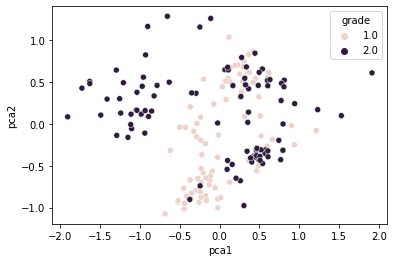

In [9]:
sns.scatterplot(data=X, x='pca1', y='pca2', hue='grade')
plt.show()

## Realizando clustering

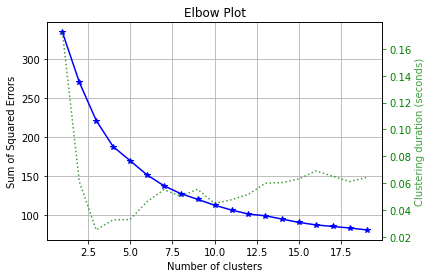

In [10]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X[columns + ['grade']], cluster_ranges=range(1, 20))
plt.show()

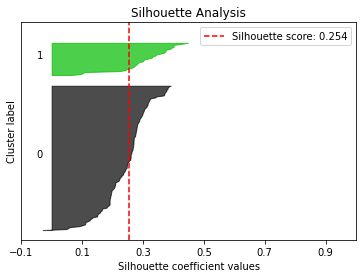

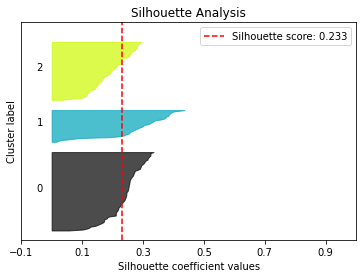

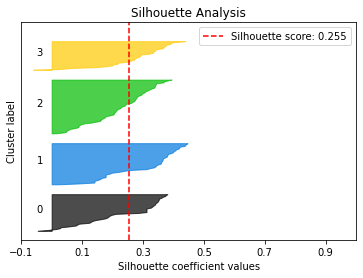

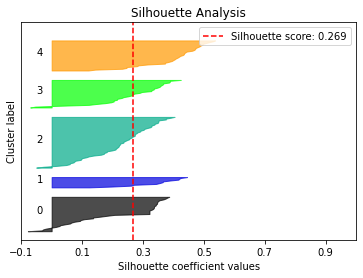

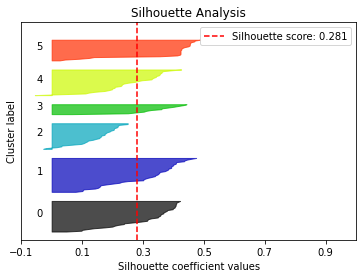

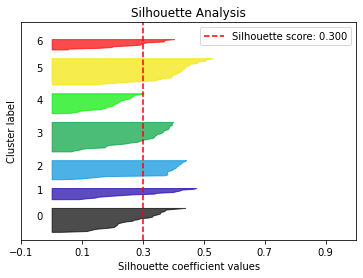

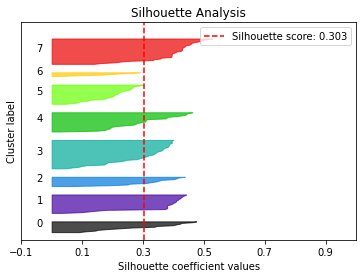

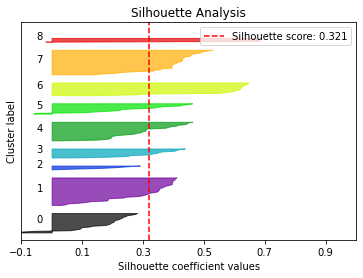

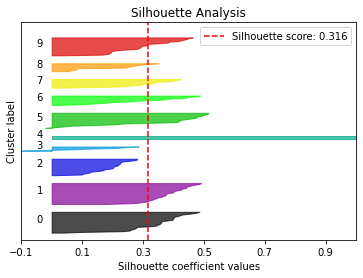

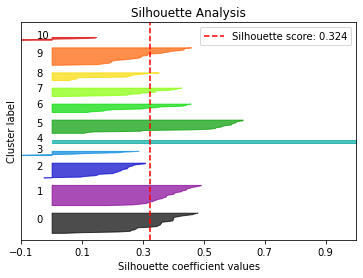

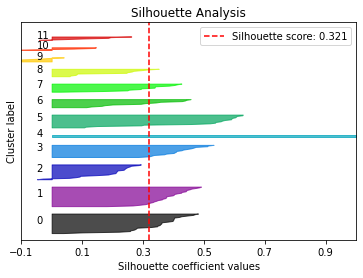

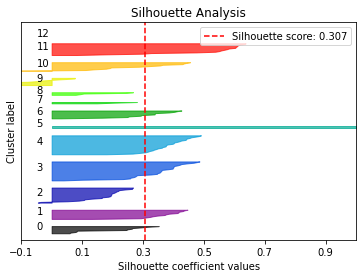

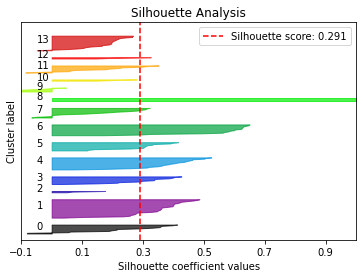

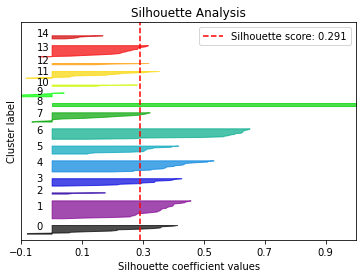

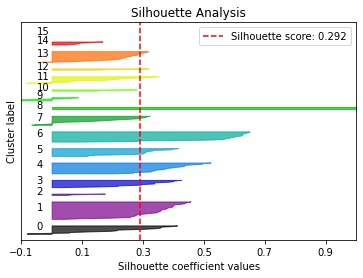

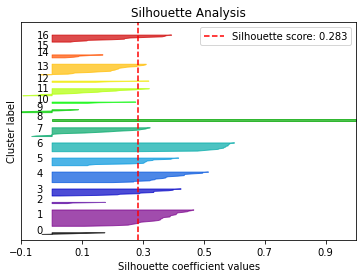

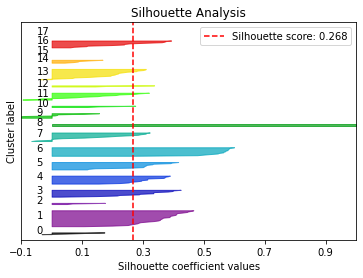

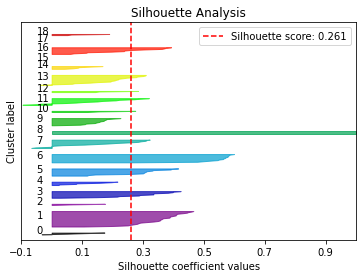

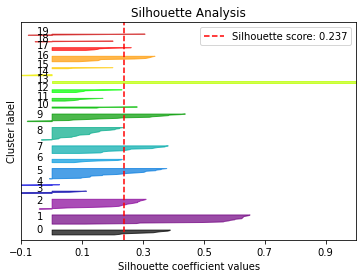

In [11]:
plot_multiple_silhouette(X[columns + ['grade']], 20)
plt.show()

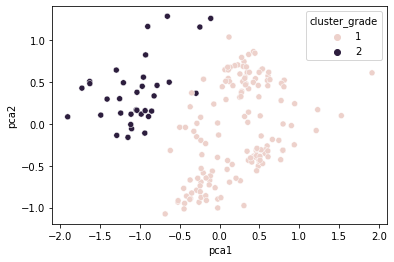

In [12]:
clf = KMeans(n_clusters=2, random_state=43, n_init=10, max_iter=300, algorithm='elkan', tol=0.0001)
clf.fit(X=X[columns + ['grade']])
X['cluster_grade'] = clf.predict(X[columns + ['grade']]) + 1
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster_grade')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(X['grade'], X['cluster_grade'].apply(lambda val: 2 if val == 1 else 1))

0.34972677595628415

In [14]:
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade,pca1,pca2,cluster_grade
0,0.341593,0.163996,0.485929,0.626634,0.292412,0.246203,0.302586,0.262719,0.260090,0.210190,...,0.000000,0.000000,0.000000,0.207698,0.303517,0.480014,1.0,0.277167,0.391344,1
1,0.276311,0.261164,0.479758,0.475081,0.365786,0.261386,0.485598,0.413523,0.348074,0.299566,...,0.021403,0.000000,0.055904,0.220507,0.262876,0.374677,1.0,0.228054,0.707781,1
2,0.106077,0.000000,0.517085,0.362587,0.513824,0.401390,0.080007,0.036732,0.196396,0.212287,...,0.000000,0.000000,0.343387,0.150496,0.286481,0.738881,1.0,-0.073126,0.239214,1
3,0.107763,0.543227,0.588817,0.409132,0.581881,0.339806,0.108581,0.110012,0.147013,0.198660,...,0.000000,0.000000,0.639544,0.000000,0.291032,0.754697,1.0,-0.369648,0.206239,1
4,0.364191,0.076495,0.434874,0.455860,0.296879,0.229679,0.460647,0.608009,0.571069,0.437690,...,0.000000,0.000000,0.000000,0.150701,0.320403,0.367645,1.0,0.449621,0.542900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.620772,0.311446,0.530721,0.528678,0.179222,0.708771,0.467523,0.390632,0.247784,0.176281,...,0.459421,0.978830,1.000000,0.208699,0.605304,0.531224,2.0,-1.255737,0.303282,2
179,0.518281,0.182702,0.484568,0.558400,0.202445,0.466286,0.219540,0.154973,0.153163,0.130232,...,0.387417,0.016443,0.136879,0.097698,0.277628,0.468820,2.0,-0.935432,0.160455,2
180,0.529223,0.289772,0.725436,0.720301,0.502276,0.406657,1.000000,0.924512,0.758334,0.636802,...,0.788691,0.071813,0.001348,0.305827,0.412042,0.503611,2.0,-0.902645,1.167678,2
181,0.253221,0.067183,0.837158,0.847326,0.745284,0.322752,0.873510,0.690864,0.483115,0.350719,...,0.865500,0.177363,0.155313,0.257149,0.687139,0.426907,2.0,-0.929602,0.827340,2


# Clustering por categoría

## Comunicación

### Dividiendo el dataset

In [15]:
X = texts[texts['category'] == 'Comunicación'].drop(columns=['filename', 'category', 'id']).dropna().copy()
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDNOUN,WRDPRO,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade
46,0.110798,0.264031,0.544362,0.226254,0.646373,0.231224,0.210726,0.067757,0.398692,0.088093,...,0.587611,0.263955,0.044967,0.249665,0.463069,0.158683,0.048587,0.386772,0.497829,1.0
47,0.023701,0.079649,0.656100,0.081223,0.852578,0.514839,0.282068,0.092339,0.302069,0.041538,...,0.601785,0.325510,0.038208,0.089751,0.605334,0.304047,0.123291,0.329737,0.374711,1.0
48,0.074001,0.026646,0.584796,0.174963,0.616418,0.771156,0.193785,0.061697,0.216121,0.021530,...,0.531705,0.401752,0.114054,0.087345,0.138557,0.192022,0.204977,0.245707,0.664924,1.0
49,0.120322,0.029587,0.559636,0.217325,0.591800,0.584848,0.284738,0.137740,0.357104,0.068066,...,0.431203,0.391440,0.101535,0.149120,0.071010,0.190000,0.245649,0.348729,0.665364,1.0
50,0.062635,0.123551,0.550943,0.346576,0.560445,0.474015,0.235342,0.097801,0.342848,0.062249,...,0.507670,0.360565,0.139811,0.096189,0.049420,0.308546,0.150680,0.259419,0.529991,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.620772,0.311446,0.530721,0.528678,0.179222,0.708771,0.467523,0.390632,0.247784,0.176281,...,0.176449,0.761696,0.275817,0.459421,0.978830,1.000000,0.208699,0.605304,0.531224,2.0
179,0.518281,0.182702,0.484568,0.558400,0.202445,0.466286,0.219540,0.154973,0.153163,0.130232,...,0.248979,0.354783,0.325624,0.387417,0.016443,0.136879,0.097698,0.277628,0.468820,2.0
180,0.529223,0.289772,0.725436,0.720301,0.502276,0.406657,1.000000,0.924512,0.758334,0.636802,...,0.158957,0.473202,0.106694,0.788691,0.071813,0.001348,0.305827,0.412042,0.503611,2.0
181,0.253221,0.067183,0.837158,0.847326,0.745284,0.322752,0.873510,0.690864,0.483115,0.350719,...,0.521421,0.748116,0.089246,0.865500,0.177363,0.155313,0.257149,0.687139,0.426907,2.0


In [16]:
X[['pca1', 'pca2']] = pca(X.drop(columns=['grade']), 2)
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade,pca1,pca2
46,0.110798,0.264031,0.544362,0.226254,0.646373,0.231224,0.210726,0.067757,0.398692,0.088093,...,0.044967,0.249665,0.463069,0.158683,0.048587,0.386772,0.497829,1.0,-0.138846,-0.440854
47,0.023701,0.079649,0.656100,0.081223,0.852578,0.514839,0.282068,0.092339,0.302069,0.041538,...,0.038208,0.089751,0.605334,0.304047,0.123291,0.329737,0.374711,1.0,-0.010837,-0.767504
48,0.074001,0.026646,0.584796,0.174963,0.616418,0.771156,0.193785,0.061697,0.216121,0.021530,...,0.114054,0.087345,0.138557,0.192022,0.204977,0.245707,0.664924,1.0,0.139784,-0.930190
49,0.120322,0.029587,0.559636,0.217325,0.591800,0.584848,0.284738,0.137740,0.357104,0.068066,...,0.101535,0.149120,0.071010,0.190000,0.245649,0.348729,0.665364,1.0,-0.055146,-0.507957
50,0.062635,0.123551,0.550943,0.346576,0.560445,0.474015,0.235342,0.097801,0.342848,0.062249,...,0.139811,0.096189,0.049420,0.308546,0.150680,0.259419,0.529991,1.0,-0.121244,-0.583675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.620772,0.311446,0.530721,0.528678,0.179222,0.708771,0.467523,0.390632,0.247784,0.176281,...,0.275817,0.459421,0.978830,1.000000,0.208699,0.605304,0.531224,2.0,1.051796,0.153545
179,0.518281,0.182702,0.484568,0.558400,0.202445,0.466286,0.219540,0.154973,0.153163,0.130232,...,0.325624,0.387417,0.016443,0.136879,0.097698,0.277628,0.468820,2.0,0.839496,-0.225368
180,0.529223,0.289772,0.725436,0.720301,0.502276,0.406657,1.000000,0.924512,0.758334,0.636802,...,0.106694,0.788691,0.071813,0.001348,0.305827,0.412042,0.503611,2.0,1.120891,1.486649
181,0.253221,0.067183,0.837158,0.847326,0.745284,0.322752,0.873510,0.690864,0.483115,0.350719,...,0.089246,0.865500,0.177363,0.155313,0.257149,0.687139,0.426907,2.0,0.937507,0.855684


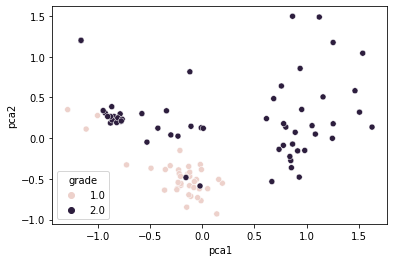

In [17]:
sns.scatterplot(data=X, x='pca1', y='pca2', hue='grade')
plt.show()

### Realizando clustering

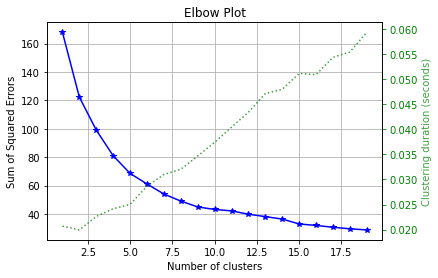

In [18]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X.drop(columns=['pca1', 'pca2', 'grade']), cluster_ranges=range(1, 20))
plt.show()

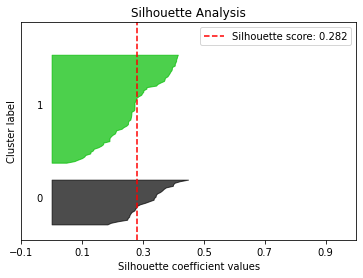

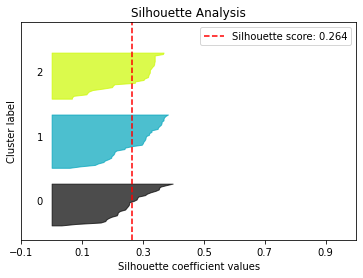

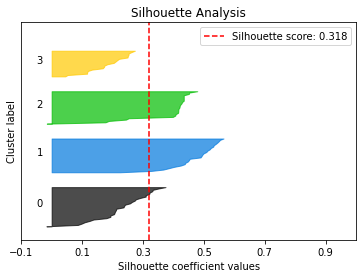

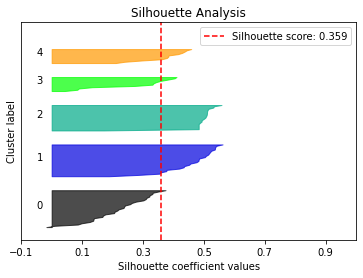

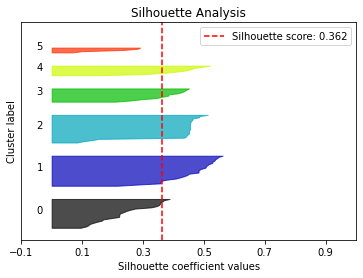

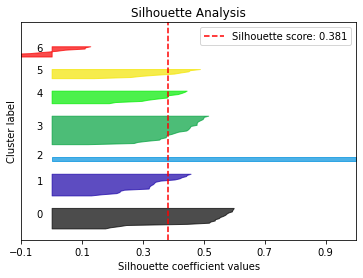

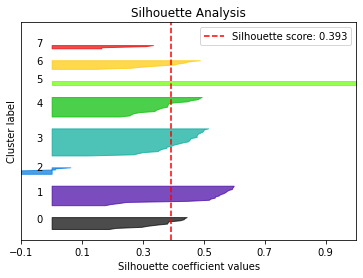

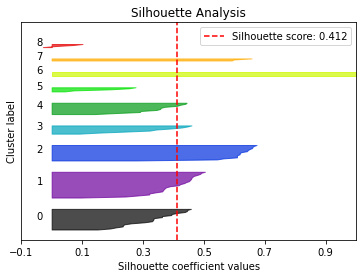

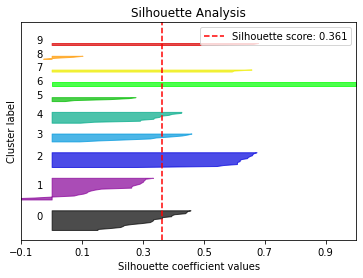

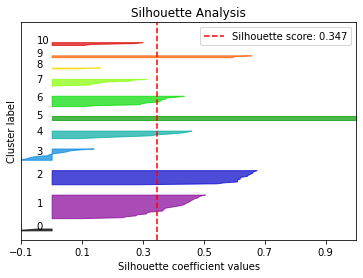

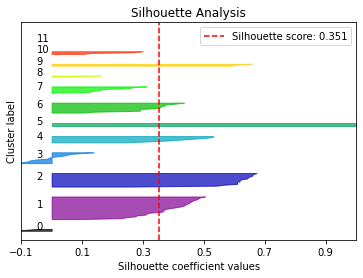

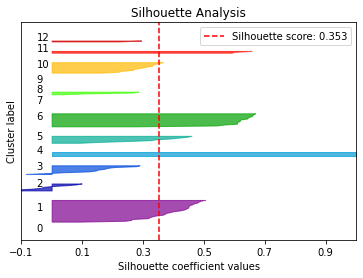

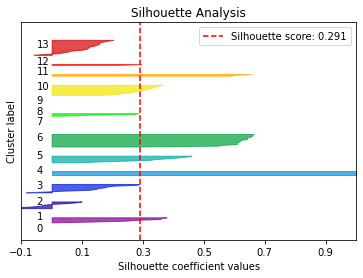

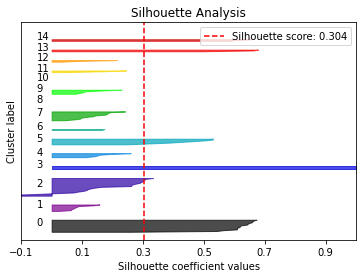

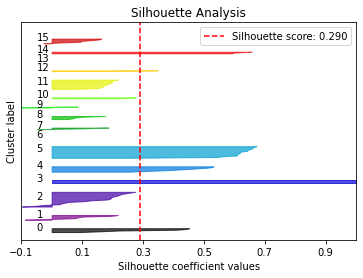

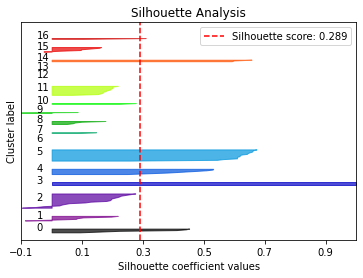

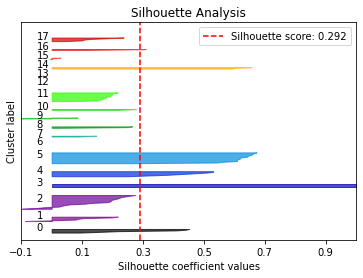

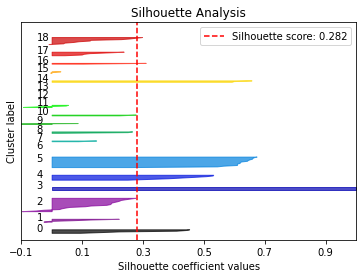

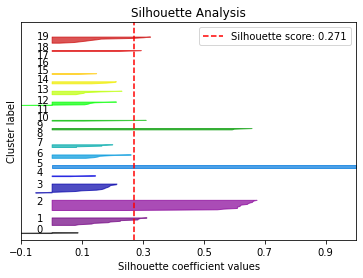

In [19]:
plot_multiple_silhouette(X.drop(columns=['pca1', 'pca2', 'grade']), 20)
plt.show()

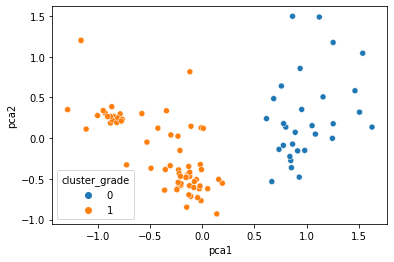

In [20]:
clf = KMeans(n_clusters=2, random_state=43)
clf.fit(X.drop(columns=['pca1', 'pca2', 'grade']))
X['cluster_grade'] = clf.predict(X.drop(columns=['pca1', 'pca2', 'grade']))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster_grade')
plt.show()

## Ciencia y tecnología

### Dividiendo el dataset

In [21]:
X = texts[texts['category'] == 'CTA'].drop(columns=['filename', 'category', 'id']).dropna().copy()
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDNOUN,WRDPRO,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade
34,0.116571,0.316417,0.477295,0.337525,0.486537,0.226204,0.421118,0.346342,0.558192,0.335219,...,0.613001,0.189263,0.010008,0.000000,0.000000,0.077407,0.165384,0.198139,0.434201,1.0
35,0.037077,0.093452,0.421239,0.200315,0.548515,0.070149,0.236137,0.277889,0.534820,0.491852,...,1.000000,0.122845,0.103452,0.022976,0.112143,0.040008,0.157808,0.200267,0.243041,1.0
36,0.159905,0.219839,0.551867,0.285033,0.607314,0.265865,0.316373,0.195981,0.732166,0.335458,...,0.690060,0.120745,0.186578,0.004504,0.000000,0.078430,0.144367,0.110640,0.382652,1.0
37,0.206795,0.521222,0.644642,0.257295,0.705239,0.347777,0.220157,0.175678,0.489048,0.284710,...,0.534361,0.170404,0.028850,0.000000,0.208489,0.130165,0.330060,0.198855,0.489937,1.0
38,0.323745,0.525862,0.552128,0.422809,0.457872,0.299452,0.347330,0.277705,0.523282,0.237302,...,0.325313,0.264167,0.232852,0.084704,0.021760,0.135853,0.199033,0.217258,0.489976,1.0
39,0.188981,0.340230,0.452816,0.223725,0.462825,0.276672,0.220766,0.109285,0.554697,0.314089,...,0.631417,0.122335,0.082860,0.012547,0.061241,0.014566,0.086179,0.119309,0.381185,1.0
40,0.025331,0.553333,0.563170,0.267665,0.690204,0.138451,0.204566,0.052425,0.528298,0.148012,...,0.585469,0.211284,0.282711,0.057555,0.051077,0.100222,0.071876,0.236328,0.535779,1.0
41,0.037763,0.380723,0.580868,0.328463,0.687346,0.171471,0.218078,0.058936,0.527078,0.142584,...,0.564285,0.212595,0.295022,0.042121,0.091373,0.081496,0.085721,0.226222,0.524683,1.0
42,0.059279,0.124510,0.527824,0.190313,0.634727,0.342693,0.280683,0.221553,0.481747,0.075231,...,0.405608,0.455924,0.374904,0.085711,0.059765,0.047974,0.147177,0.349295,0.700217,1.0
43,0.064493,0.046444,0.672933,0.178464,0.885947,0.273091,0.198964,0.111031,0.337216,0.036595,...,0.484742,0.374292,0.323906,0.051383,0.027866,0.044737,0.274496,0.350613,0.622594,1.0


In [22]:
X[['pca1', 'pca2']] = pca(X.drop(columns=['grade']), 2)
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade,pca1,pca2
34,0.116571,0.316417,0.477295,0.337525,0.486537,0.226204,0.421118,0.346342,0.558192,0.335219,...,0.010008,0.000000,0.000000,0.077407,0.165384,0.198139,0.434201,1.0,0.121118,-0.304448
35,0.037077,0.093452,0.421239,0.200315,0.548515,0.070149,0.236137,0.277889,0.534820,0.491852,...,0.103452,0.022976,0.112143,0.040008,0.157808,0.200267,0.243041,1.0,0.476237,0.166578
36,0.159905,0.219839,0.551867,0.285033,0.607314,0.265865,0.316373,0.195981,0.732166,0.335458,...,0.186578,0.004504,0.000000,0.078430,0.144367,0.110640,0.382652,1.0,0.110062,-0.076603
37,0.206795,0.521222,0.644642,0.257295,0.705239,0.347777,0.220157,0.175678,0.489048,0.284710,...,0.028850,0.000000,0.208489,0.130165,0.330060,0.198855,0.489937,1.0,0.255433,-0.242235
38,0.323745,0.525862,0.552128,0.422809,0.457872,0.299452,0.347330,0.277705,0.523282,0.237302,...,0.232852,0.084704,0.021760,0.135853,0.199033,0.217258,0.489976,1.0,0.304475,-0.453047
39,0.188981,0.340230,0.452816,0.223725,0.462825,0.276672,0.220766,0.109285,0.554697,0.314089,...,0.082860,0.012547,0.061241,0.014566,0.086179,0.119309,0.381185,1.0,-0.086988,-0.181038
40,0.025331,0.553333,0.563170,0.267665,0.690204,0.138451,0.204566,0.052425,0.528298,0.148012,...,0.282711,0.057555,0.051077,0.100222,0.071876,0.236328,0.535779,1.0,-0.106857,0.194063
41,0.037763,0.380723,0.580868,0.328463,0.687346,0.171471,0.218078,0.058936,0.527078,0.142584,...,0.295022,0.042121,0.091373,0.081496,0.085721,0.226222,0.524683,1.0,-0.100999,0.133750
42,0.059279,0.124510,0.527824,0.190313,0.634727,0.342693,0.280683,0.221553,0.481747,0.075231,...,0.374904,0.085711,0.059765,0.047974,0.147177,0.349295,0.700217,1.0,-0.006363,0.706569
43,0.064493,0.046444,0.672933,0.178464,0.885947,0.273091,0.198964,0.111031,0.337216,0.036595,...,0.323906,0.051383,0.027866,0.044737,0.274496,0.350613,0.622594,1.0,0.024887,0.770993


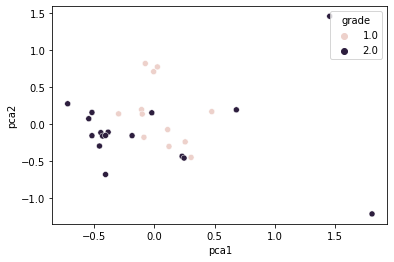

In [23]:
sns.scatterplot(data=X, x='pca1', y='pca2', hue='grade')
plt.show()

### Realizando clustering

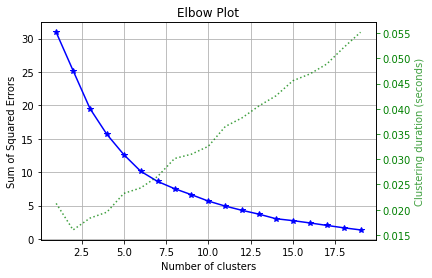

In [24]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X.drop(columns=['pca1', 'pca2', 'grade']), cluster_ranges=range(1, 20))
plt.show()

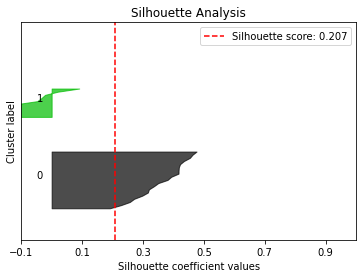

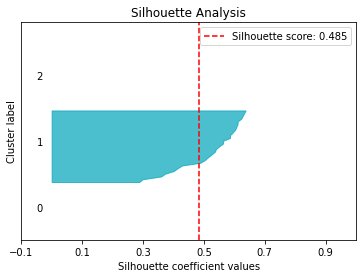

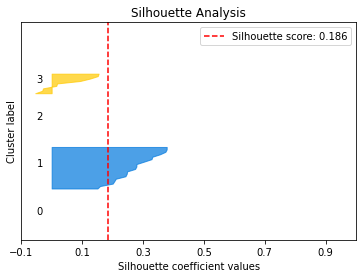

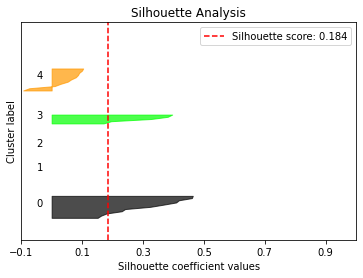

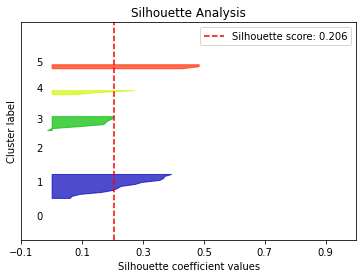

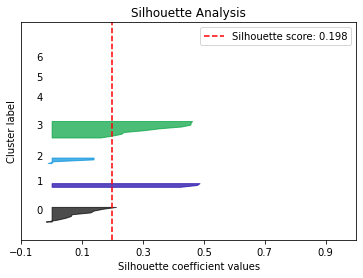

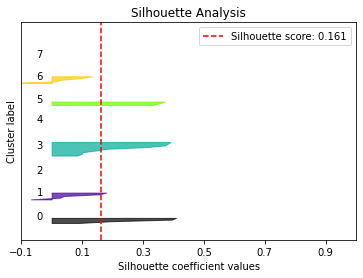

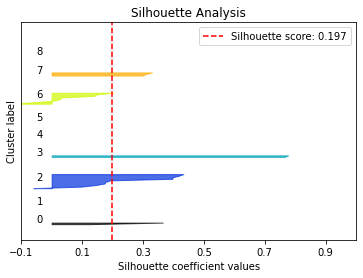

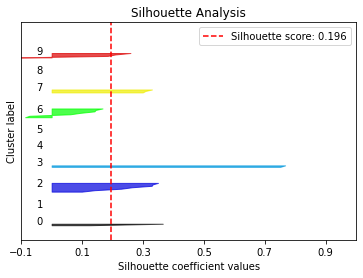

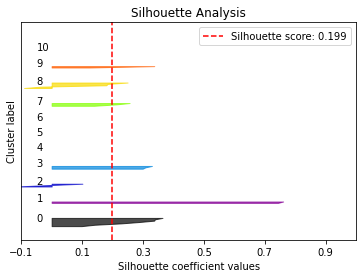

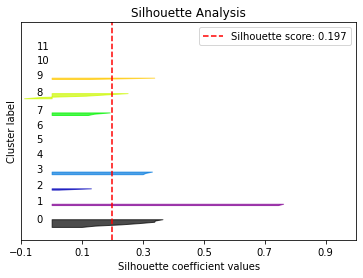

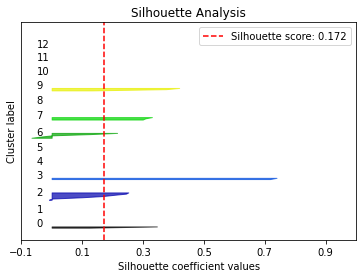

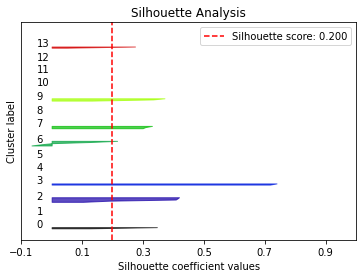

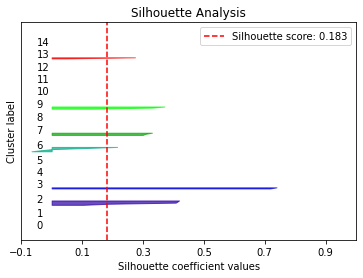

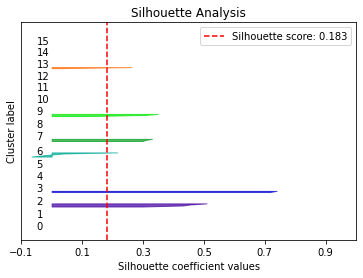

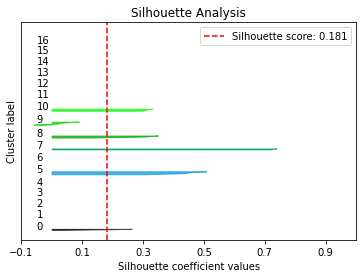

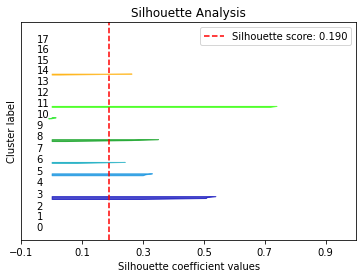

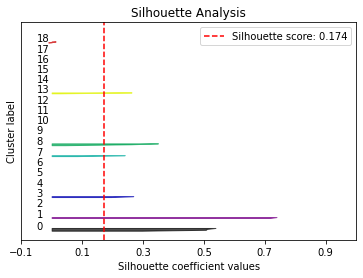

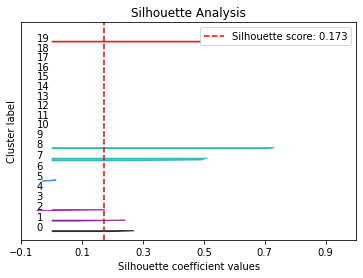

In [25]:
plot_multiple_silhouette(X.drop(columns=['pca1', 'pca2', 'grade']), 20)
plt.show()

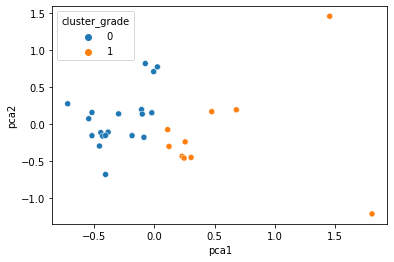

In [26]:
clf = KMeans(n_clusters=2, random_state=43)
clf.fit(X.drop(columns=['pca1', 'pca2', 'grade']))
X['cluster_grade'] = clf.predict(X.drop(columns=['pca1', 'pca2', 'grade']))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster_grade')
plt.show()

## Historia, Geografía y Economía

### Dividiendo el dataset

In [27]:
X = texts[texts['category'] == 'Historia, Geografía y Economía'].drop(columns=['filename', 'category', 'id']).dropna().copy()
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDNOUN,WRDPRO,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade
0,0.341593,0.163996,0.485929,0.626634,0.292412,0.246203,0.302586,0.262719,0.260090,0.210190,...,0.667866,0.210277,0.000000,0.000000,0.000000,0.000000,0.207698,0.303517,0.480014,1.0
1,0.276311,0.261164,0.479758,0.475081,0.365786,0.261386,0.485598,0.413523,0.348074,0.299566,...,0.536937,0.205378,0.057822,0.021403,0.000000,0.055904,0.220507,0.262876,0.374677,1.0
2,0.106077,0.000000,0.517085,0.362587,0.513824,0.401390,0.080007,0.036732,0.196396,0.212287,...,0.427442,0.139035,0.000000,0.000000,0.000000,0.343387,0.150496,0.286481,0.738881,1.0
3,0.107763,0.543227,0.588817,0.409132,0.581881,0.339806,0.108581,0.110012,0.147013,0.198660,...,0.378253,0.367486,0.000000,0.000000,0.000000,0.639544,0.000000,0.291032,0.754697,1.0
4,0.364191,0.076495,0.434874,0.455860,0.296879,0.229679,0.460647,0.608009,0.571069,0.437690,...,0.615042,0.209099,0.000000,0.000000,0.000000,0.000000,0.150701,0.320403,0.367645,1.0
5,0.649096,0.000000,0.526864,0.461724,0.307388,0.368421,0.282087,0.208143,0.227161,0.183025,...,0.485756,0.229688,0.018111,0.060334,0.196324,0.087551,0.322313,0.302791,0.517211,1.0
6,0.307286,0.258170,0.523582,0.443605,0.438642,0.258389,0.299745,0.367117,0.320699,0.338939,...,0.511853,0.148386,0.000000,0.010579,0.000000,0.000000,0.145319,0.234714,0.356260,1.0
7,0.188321,0.474660,0.441909,0.464707,0.307670,0.336504,0.229788,0.419740,0.374570,0.323415,...,0.596864,0.296931,0.052545,0.000000,0.000000,0.000000,0.267178,0.231180,0.373577,1.0
8,0.115702,0.145813,0.373006,0.407500,0.316421,0.182421,0.276388,0.363003,0.356604,0.274237,...,0.631668,0.178856,0.000000,0.000000,0.000000,0.000000,0.184670,0.319577,0.275228,1.0
9,0.467399,0.130897,0.694424,0.594607,0.592848,0.229264,0.228837,0.110520,0.363208,0.304344,...,0.592376,0.127011,0.000000,0.144816,0.000000,0.000000,0.405237,0.204007,0.318580,1.0


In [28]:
X[['pca1', 'pca2']] = pca(X.drop(columns=['grade']), 2)
X

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,grade,pca1,pca2
0,0.341593,0.163996,0.485929,0.626634,0.292412,0.246203,0.302586,0.262719,0.260090,0.210190,...,0.000000,0.000000,0.000000,0.000000,0.207698,0.303517,0.480014,1.0,-0.065595,0.018727
1,0.276311,0.261164,0.479758,0.475081,0.365786,0.261386,0.485598,0.413523,0.348074,0.299566,...,0.057822,0.021403,0.000000,0.055904,0.220507,0.262876,0.374677,1.0,0.007398,-0.355985
2,0.106077,0.000000,0.517085,0.362587,0.513824,0.401390,0.080007,0.036732,0.196396,0.212287,...,0.000000,0.000000,0.000000,0.343387,0.150496,0.286481,0.738881,1.0,-0.574072,0.018261
3,0.107763,0.543227,0.588817,0.409132,0.581881,0.339806,0.108581,0.110012,0.147013,0.198660,...,0.000000,0.000000,0.000000,0.639544,0.000000,0.291032,0.754697,1.0,-0.869434,-0.057522
4,0.364191,0.076495,0.434874,0.455860,0.296879,0.229679,0.460647,0.608009,0.571069,0.437690,...,0.000000,0.000000,0.000000,0.000000,0.150701,0.320403,0.367645,1.0,0.277962,-0.072022
5,0.649096,0.000000,0.526864,0.461724,0.307388,0.368421,0.282087,0.208143,0.227161,0.183025,...,0.018111,0.060334,0.196324,0.087551,0.322313,0.302791,0.517211,1.0,-0.418457,-0.311272
6,0.307286,0.258170,0.523582,0.443605,0.438642,0.258389,0.299745,0.367117,0.320699,0.338939,...,0.000000,0.010579,0.000000,0.000000,0.145319,0.234714,0.356260,1.0,0.112824,-0.361090
7,0.188321,0.474660,0.441909,0.464707,0.307670,0.336504,0.229788,0.419740,0.374570,0.323415,...,0.052545,0.000000,0.000000,0.000000,0.267178,0.231180,0.373577,1.0,-0.108187,0.018295
8,0.115702,0.145813,0.373006,0.407500,0.316421,0.182421,0.276388,0.363003,0.356604,0.274237,...,0.000000,0.000000,0.000000,0.000000,0.184670,0.319577,0.275228,1.0,0.003242,-0.145178
9,0.467399,0.130897,0.694424,0.594607,0.592848,0.229264,0.228837,0.110520,0.363208,0.304344,...,0.000000,0.144816,0.000000,0.000000,0.405237,0.204007,0.318580,1.0,0.111149,-0.217397


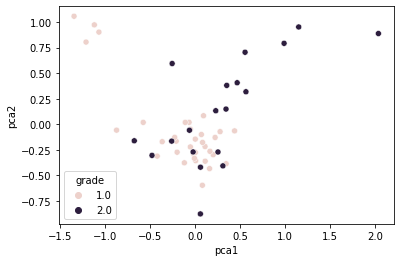

In [29]:
sns.scatterplot(data=X, x='pca1', y='pca2', hue='grade')
plt.show()

### Realizando clustering

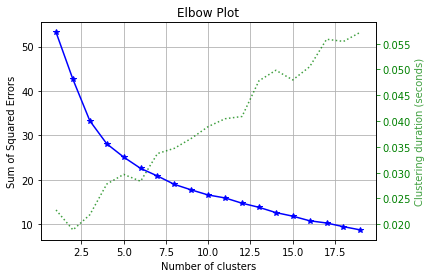

In [30]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X.drop(columns=['pca1', 'pca2', 'grade']), cluster_ranges=range(1, 20))
plt.show()

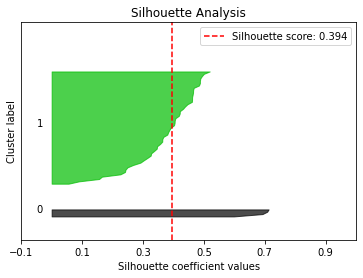

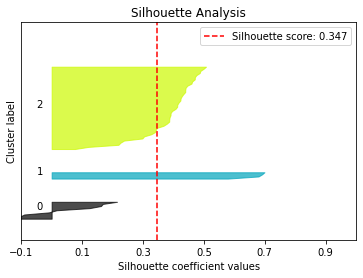

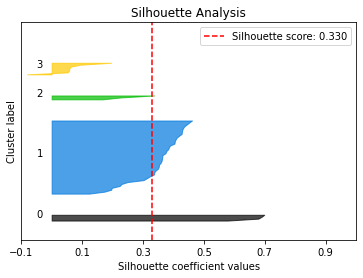

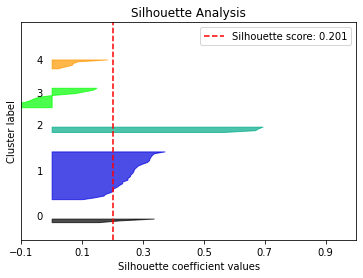

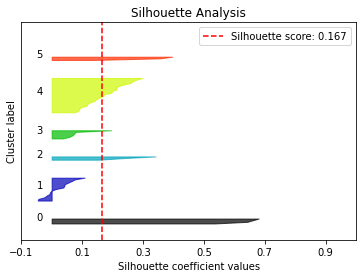

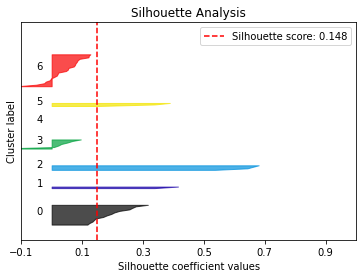

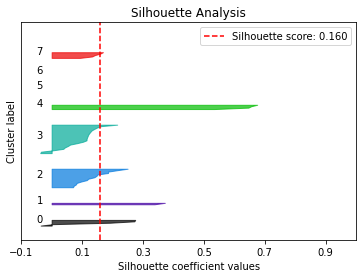

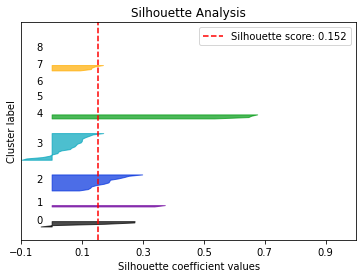

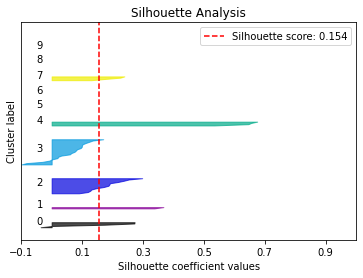

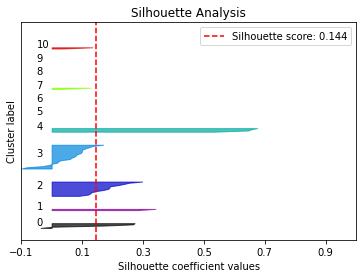

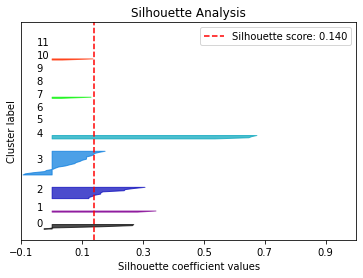

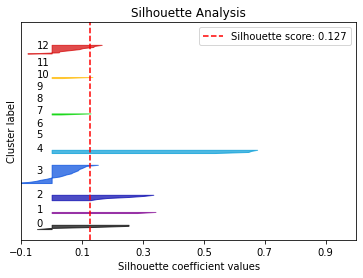

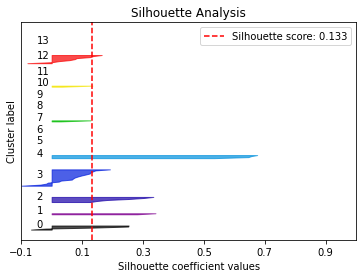

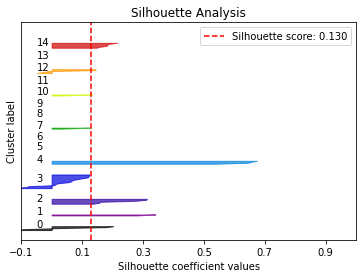

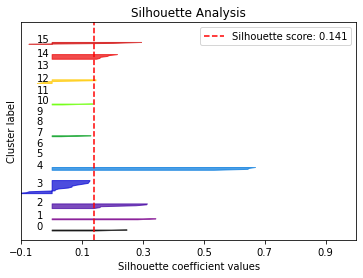

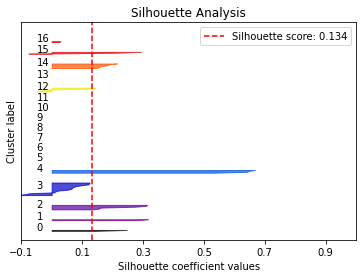

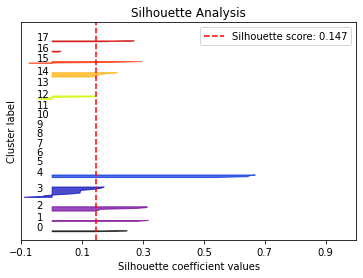

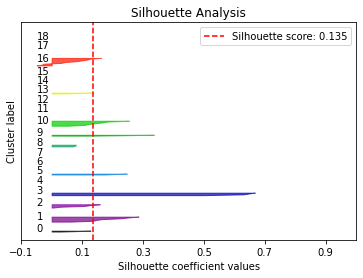

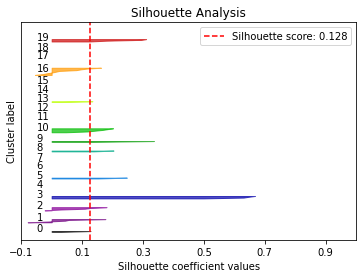

In [31]:
plot_multiple_silhouette(X.drop(columns=['pca1', 'pca2', 'grade']), 20)
plt.show()

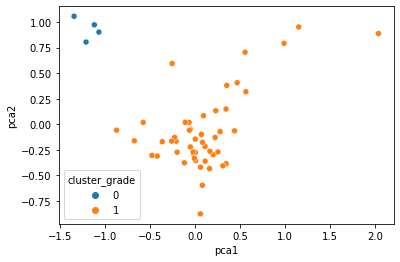

In [32]:
clf = KMeans(n_clusters=2, random_state=43)
clf.fit(X.drop(columns=['pca1', 'pca2', 'grade']))
X['cluster_grade'] = clf.predict(X.drop(columns=['pca1', 'pca2', 'grade']))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster_grade')
plt.show()

In [33]:
XX = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(XX)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.transform(XX))

NameError: name 'np' is not defined

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()